### 1. Librerías

In [2]:
!pip install pmdarima

In [99]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=1a19ae0f092cb8298ba467830227d1071aaa187fc50cd22133471cc4e28a4f9d
  Stored in directory: c:\users\crist\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima

### 2. Preparación de los datos

In [8]:
archivo = "datos_procesados2.csv"
df = pd.read_csv(archivo)
df['mes_año_datetime'] = pd.to_datetime(df['mes_año'])

In [50]:
datos_n_transferidos = df.n_transferidos
datos_n_transferidos_desde_marzo2014 = df.n_transferidos[54:]

datos_ratio_conBen = df.ratio*100
datos_ratio_hasta_noviembre2003 = df.ratio[:49]*100
datos_ratio_desde_marzo2004 = df.ratio[52:]*100
datos_ratio_sinBen = pd.concat([datos_ratio_hasta_noviembre2003, datos_ratio_desde_marzo2004])

datos_ratio_sinBen.to_csv("datos_procesados_sinBen.csv", sep = ',', index= False)

#### 2.1. Creación de dataframes con los datos a analizar para su representación
El dataframe esta formado por la fecha (en formato datatime) y su ratio correspondiente

In [52]:
train_df = pd.DataFrame()
train_df['fecha'] = df['mes_año_datetime']
train_df['ratio'] = df['ratio']*100
train_df.set_index('fecha', inplace = True)
train_df

,ratio
fecha,
1999-11-01,0.242131
1999-12-01,0.225734
2000-01-01,0.264550
2000-02-01,0.000000
2000-03-01,0.257732
...,...
2011-01-01,0.000000
2011-02-01,0.218818
2011-03-01,0.535714


#### Dataframe con todos los datos

<AxesSubplot:xlabel='fecha'>

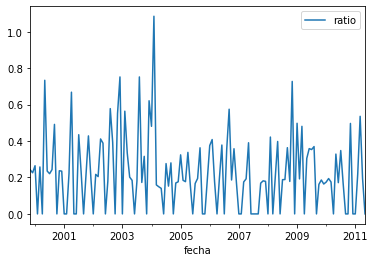

In [53]:
train_df.plot()

#### Dataframe con los datos hasta noviembre de 2003

In [54]:
train_df_hasta_noviembre2003 = train_df[:49]
train_df_hasta_noviembre2003

,ratio
fecha,
1999-11-01,0.242131
1999-12-01,0.225734
2000-01-01,0.264550
2000-02-01,0.000000
2000-03-01,0.257732
2000-04-01,0.000000
2000-05-01,0.733496
2000-06-01,0.235294
2000-07-01,0.220751


<AxesSubplot:xlabel='fecha'>

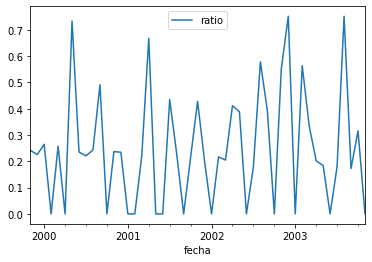

In [55]:
train_df_hasta_noviembre2003.plot()

#### Dataframe con los datos desde marzo

In [56]:
train_df_marzo2004 = train_df[52:]
train_df_marzo2004

,ratio
fecha,
2004-03-01,0.159236
2004-04-01,0.149031
2004-05-01,0.140253
2004-06-01,0.000000
2004-07-01,0.276243
...,...
2011-01-01,0.000000
2011-02-01,0.218818
2011-03-01,0.535714


<AxesSubplot:xlabel='fecha'>

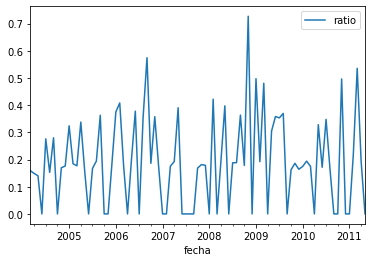

In [57]:
train_df_marzo2004.plot()

#### Dataframe con los datos de los meses en los que no trabajó Ben

<AxesSubplot:xlabel='fecha'>

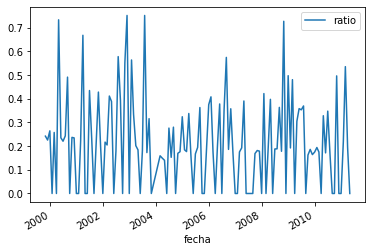

In [58]:
train_df_sinBen = pd.concat([train_df_hasta_noviembre2003, train_df_marzo2004])
train_df_sinBen.plot()

#### Dataframe con los datos hasta abril 2009 (prueba del fuyncionamiento de ARIMA)

In [59]:
train_df_hasta_abril2009 = train_df[:114]
train_df_hasta_abril2009

,ratio
fecha,
1999-11-01,0.242131
1999-12-01,0.225734
2000-01-01,0.264550
2000-02-01,0.000000
2000-03-01,0.257732
...,...
2008-12-01,0.000000
2009-01-01,0.497512
2009-02-01,0.192308


<AxesSubplot:xlabel='fecha'>

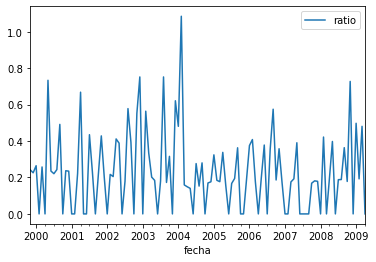

In [60]:
train_df_hasta_abril2009.plot()

In [61]:
train_df_hasta_noviembre2003 = train_df[:49]
train_df_hasta_noviembre2003

,ratio
fecha,
1999-11-01,0.242131
1999-12-01,0.225734
2000-01-01,0.264550
2000-02-01,0.000000
2000-03-01,0.257732
2000-04-01,0.000000
2000-05-01,0.733496
2000-06-01,0.235294
2000-07-01,0.220751


<AxesSubplot:xlabel='fecha'>

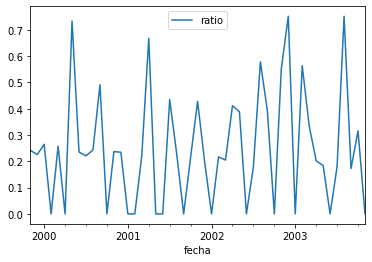

In [69]:
train_df_hasta_noviembre2003.plot()

### 2. Test de Estacionalidad

In [70]:
from pmdarima.arima.stationarity import ADFTest

# Probar si se debe diferenciar el nivel de significancia alpha = 0,05
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(train_df)

(0.01, False)

Con estos datos podemos concluir que los datos no son estacionarios. Por lo tanto, necesitamos utilizar el "Integrated (I)" concept, denotado por 'd' en las series temporales para hacer los datos estacionarios cuando construyamos el modelo ARIMA

#### Autocorrelation

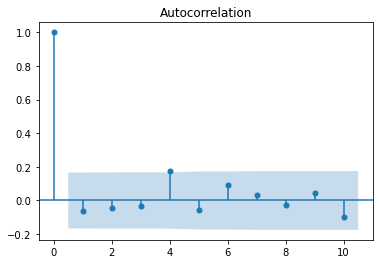

In [71]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(train_df, lags=10)
plt.show()

### 3. Modelo ARIMA

- Auto-regresivo (p) -> Número de términos autorregresivos.
- Integrado (d) -> Número de diferencias no estacionales necesarias para la estacionariedad.
- Media móvil (q) -> Número de errores de pronóstico retrasados en la ecuación de predicción.

En el modelo Auto ARIMA, hay que tener en cuenta que los valores pequeños de p, d, q representan componentes no estacionales, y las mayúsculas P, D, Q representan componentes estacionales. Funciona de manera similar a las técnicas de hipersintonización para encontrar el valor óptimo de p, d y q con diferentes combinaciones y los valores finales se determinarían teniendo en cuenta los parámetros AIC y BIC más bajos.
Aquí, estamos intentando con los valores p, d, q que van de 0 a 5 para obtener mejores valores óptimos del modelo.

#### 3.1. Dataset entrenamiento 1: 80% de los datos teniendo en cuenta los meses de Ben

In [72]:
train_df_1 = train_df[:112]
arima_model = pmdarima.auto_arima(train_df_1, start_p=0, d=1, start_q=0, 
                         max_p=5, max_d=5, max_q=5, start_P=0, 
                         D=1, start_Q=0, max_P=5, max_D=5,
                         max_Q=5, m=12, seasonal=True,
                         error_action='warn', trace=True,
                         supress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=108.416, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=55.745, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=78.821, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=56.416, Time=0.12 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=87.601, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=46.132, Time=0.07 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=67.400, Time=0.03 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=47.797, Time=0.27 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.12 sec
 A

In [80]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  112
Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 -13.293
Date:                            Mon, 14 Feb 2022   AIC                             36.586
Time:                                    22:00:26   BIC                             49.561
Sample:                                         0   HQIC                            41.835
                                            - 112                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8365      0.088     -9.557      0.000      -1.008      -0.665
ar.L2         -0.5770      0.112     -5.138      0.000      -0.797      -0.357
ar.L3         -0.3437      0.113     -3.055      0.002      -0.564      -0.123
ar.S.L12      -0.4438      0.110     -4.025      0.000      -0.660      -0.228
sigma2         0.0739      0.011      6.734      0.000       0.052       0.095
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.65   Prob(JB):                         0.92
Heteroskedasticity (H):               0.88   Skew:                            -0.10
Prob(H) (two-sided):                  0.71   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Forecasting

In [81]:
test_df_1 = train_df[113:]
prediction_1 = pd.DataFrame(arima_model.predict(n_periods = 26), index=test_df_1.index)
prediction_1.columns = ['ratio_predicho']
prediction_1

,ratio_predicho
fecha,
2009-04-01,0.319674
2009-05-01,0.278622
2009-06-01,0.632124
2009-07-01,0.102512
2009-08-01,0.285685
2009-09-01,0.245472
2009-10-01,0.377807
2009-11-01,0.316652
2009-12-01,0.648963


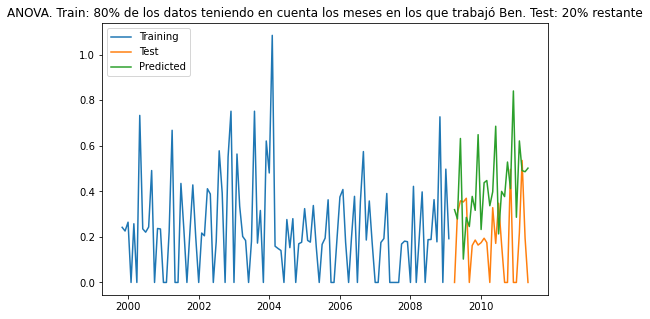

In [92]:
plt.figure(figsize=(8,5))
plt.plot(train_df_1, label = "Training")
plt.plot(test_df_1, label = "Test")
plt.plot(prediction_1, label = "Predicted")
plt.legend(loc = 'upper left')
plt.title("ANOVA. Train: 80% de los datos teniendo en cuenta los meses en los que trabajó Ben. Test: 20% restante")
plt.show()

In [106]:
from sklearn.metrics import r2_score
test_df_1['predicted_ratio'] = prediction_1
r2_score(test_df_1['ratio'], test_df_1['predicted_ratio'])

C:\Users\crist\AppData\Local\Temp/ipykernel_1772/1276552972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_1['predicted_ratio'] = prediction_1


-3.4850835353526968

#### 3.2. Dataset entrenamiento 2: 80% de los datos teniendo sin tener en cuenta los meses de Ben

In [83]:
datos_hasta_noviembre2003 = train_df[:49]
datos_desde_marzo2004 = train_df[52:115]
train_df_2 = pd.concat([datos_hasta_noviembre2003, datos_desde_marzo2004])
arima_model_2 = pmdarima.auto_arima(train_df_2, start_p=0, d=1, start_q=0, 
                         max_p=5, max_d=5, max_q=5, start_P=0, 
                         D=1, start_Q=0, max_P=5, max_D=5,
                         max_Q=5, m=12, seasonal=True,
                         error_action='warn', trace=True,
                         supress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=99.862, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=54.641, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=70.632, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=47.829, Time=0.16 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=43.441, Time=0.38 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=42.893, Time=0.76 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=40.862, Time=1.45 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=42.853, Time=2.58 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=42.507, Time=1.98 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=68.348, Time=0.94 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=27.122, Time=1.86 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=27.542, Time=0.97 sec
 ARIMA(2,1,0)(5,1,1)[12]             : AIC=29.119, Time=3.31 sec
 ARIMA(2,1,0)(4,1,1)[12]             : AIC=28.032,

In [84]:
arima_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  112
Model:             SARIMAX(3, 1, 1)x(5, 1, [], 12)   Log Likelihood                   9.542
Date:                             Mon, 14 Feb 2022   AIC                              0.915
Time:                                     22:02:04   BIC                             26.867
Sample:                                          0   HQIC                            11.415
                                             - 112                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2837      0.116     -2.444      0.015      -0.511      -0.056
ar.L2         -0.2857      0.134     -2.137      0.033      -0.548      -0.024
ar.L3         -0.1984      0.138     -1.441      0.149      -0.468       0.071
ma.L1         -0.7866      0.101     -7.765      0.000      -0.985      -0.588
ar.S.L12      -0.9891      0.125     -7.906      0.000      -1.234      -0.744
ar.S.L24      -0.8955      0.171     -5.230      0.000      -1.231      -0.560
ar.S.L36      -0.7569      0.202     -3.750      0.000      -1.152      -0.361
ar.S.L48      -0.6067      0.159     -3.810      0.000      -0.919      -0.295
ar.S.L60      -0.3826      0.157     -2.443      0.015      -0.689      -0.076
sigma2         0.0374      0.007      5.236      0.000       0.023       0.051
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.08
Prob(Q):                              0.90   Prob(JB):                         0.35
Heteroskedasticity (H):               0.83   Skew:                             0.28
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Forecasting

In [85]:
test_df_2 = train_df[116:]
prediction_2 = pd.DataFrame(arima_model.predict(n_periods = 23), index=test_df_2.index)
prediction_2.columns = ['ratio_predicho']
prediction_2

,ratio_predicho
fecha,
2009-07-01,0.319674
2009-08-01,0.278622
2009-09-01,0.632124
2009-10-01,0.102512
2009-11-01,0.285685
2009-12-01,0.245472
2010-01-01,0.377807
2010-02-01,0.316652
2010-03-01,0.648963


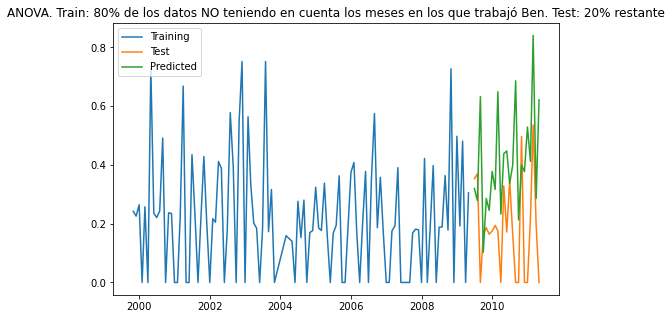

In [93]:
plt.figure(figsize=(8,5))
plt.plot(train_df_2, label = "Training")
plt.plot(test_df_2, label = "Test")
plt.plot(prediction_2, label = "Predicted")
plt.legend(loc = 'upper left')
plt.title("ANOVA. Train: 80% de los datos NO teniendo en cuenta los meses en los que trabajó Ben. Test: 20% restante")
plt.show()

In [107]:
test_df_2['predicted_ratio'] = prediction_2
r2_score(test_df_2['ratio'], test_df_2['predicted_ratio'])

C:\Users\crist\AppData\Local\Temp/ipykernel_1772/899070636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_2['predicted_ratio'] = prediction_2


-3.155354201444104

#### 3.3. Dataset entrenamiento 3: entrenamiento con los datos posteriores a los meses trabajados por Ben

In [87]:
train_df_3 = train_df[52:115]
arima_model_2 = pmdarima.auto_arima(train_df_3, start_p=0, d=1, start_q=0, 
                         max_p=5, max_d=5, max_q=5, start_P=0, 
                         D=1, start_Q=0, max_P=5, max_D=5,
                         max_Q=5, m=12, seasonal=True,
                         error_action='warn', trace=True,
                         supress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=38.452, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6.313, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=16.328, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6.271, Time=0.19 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=7.895, Time=0.49 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=5.790, Time=0.21 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3.796, Time=0.08 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=5.791, Time=0.19 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=7.796, Time=0.27 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=3.899, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIM

In [88]:
arima_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   63
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                   1.102
Date:                              Mon, 14 Feb 2022   AIC                              3.796
Time:                                      22:02:31   BIC                              9.532
Sample:                                           0   HQIC                             5.981
                                               - 63                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6030      0.115     -5.244      0.000      -0.828      -0.378
ma.S.L12      -0.7181      0.317     -2.262      0.024      -1.340      -0.096
sigma2         0.0470      0.012      3.801      0.000       0.023       0.071
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.37   Prob(JB):                         0.85
Heteroskedasticity (H):               1.22   Skew:                             0.09
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
test_df_3 = train_df[:52]
prediction_3 = pd.DataFrame(arima_model.predict(n_periods = 52), index=test_df_3.index)
prediction_3.columns = ['ratio_predicho']
prediction_3

,ratio_predicho
fecha,
1999-11-01,0.319674
1999-12-01,0.278622
2000-01-01,0.632124
2000-02-01,0.102512
2000-03-01,0.285685
2000-04-01,0.245472
2000-05-01,0.377807
2000-06-01,0.316652
2000-07-01,0.648963


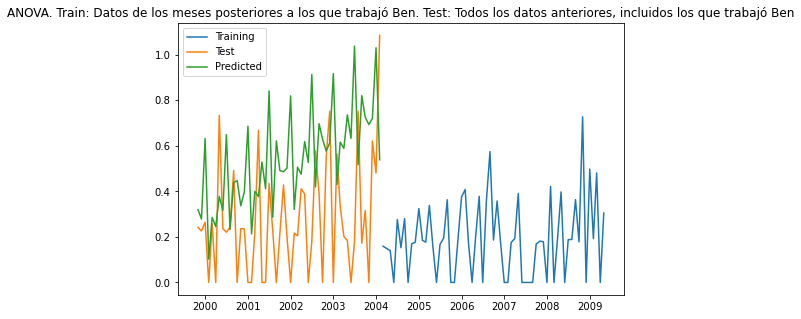

In [94]:
plt.figure(figsize=(8,5))
plt.plot(train_df_3, label = "Training")
plt.plot(test_df_3, label = "Test")
plt.plot(prediction_3, label = "Predicted")
plt.legend(loc = 'upper left')
plt.title("ANOVA. Train: Datos de los meses posteriores a los que trabajó Ben. Test: Todos los datos anteriores, incluidos los que trabajó Ben")
plt.show()

In [108]:
test_df_3['predicted_ratio'] = prediction_3
r2_score(test_df_3['ratio'], test_df_3['predicted_ratio'])

C:\Users\crist\AppData\Local\Temp/ipykernel_1772/342437697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_3['predicted_ratio'] = prediction_3


-1.8429181457748247

### 4. Forecasting on the test data

In [67]:
test_df = train_df[0:51]
prediction = pd.DataFrame(arima_model.predict(n_periods = 51), index=test_df.index)
prediction.columns = ['ratio_predicho']
prediction

,ratio_predicho
fecha,
1999-11-01,0.001691
1999-12-01,0.002356
2000-01-01,0.003594
2000-02-01,0.001057
2000-03-01,0.001717
2000-04-01,0.002517
2000-05-01,0.003389
2000-06-01,0.001916
2000-07-01,0.004337


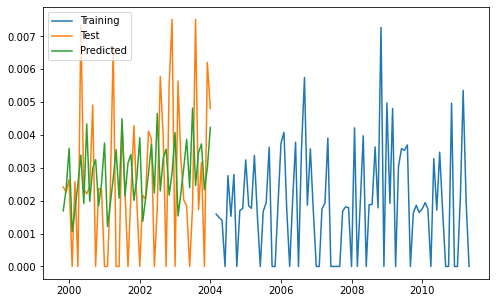

In [68]:
plt.figure(figsize=(8,5))
plt.plot(train_df_marzo2004, label = "Training")
plt.plot(test_df, label = "Test")
plt.plot(prediction, label = "Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [69]:
test_df = train_df[55:]
prediction = pd.DataFrame(arima_model.predict(n_periods = 84), index=test_df.index)
prediction.columns = ['ratio_predicho']
prediction

,ratio_predicho
fecha,
2004-06-01,0.001691
2004-07-01,0.002356
2004-08-01,0.003594
2004-09-01,0.001057
2004-10-01,0.001717
...,...
2011-01-01,0.002875
2011-02-01,0.005295
2011-03-01,0.002941


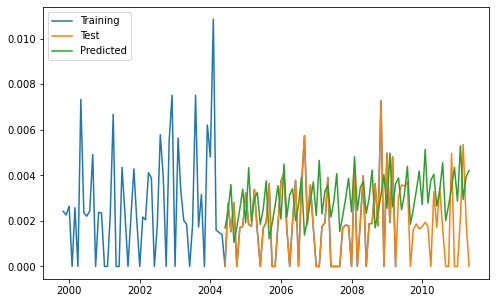

In [70]:
plt.figure(figsize=(8,5))
plt.plot(train_df_hasta_abril2009, label = "Training")
plt.plot(test_df, label = "Test")
plt.plot(prediction, label = "Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [71]:
test_df = train_df[51:]
prediction = pd.DataFrame(arima_model.predict(n_periods = 88), index=test_df.index)
prediction.columns = ['ratio_predicho']
prediction

,ratio_predicho
fecha,
2004-02-01,0.001691
2004-03-01,0.002356
2004-04-01,0.003594
2004-05-01,0.001057
2004-06-01,0.001717
...,...
2011-01-01,0.004209
2011-02-01,0.002810
2011-03-01,0.003475


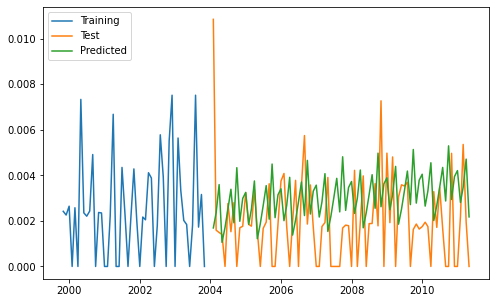

In [72]:
plt.figure(figsize=(8,5))
plt.plot(train_df_hasta_noviembre2003, label = "Training")
plt.plot(test_df, label = "Test")
plt.plot(prediction, label = "Predicted")
plt.legend(loc = 'upper left')
plt.show()